# Оценка эффективности моделей бинарной классификации.

### Содержание работы

1) Загрузите данные о вероятности развития диабета.

2) Разделите данные на обучающую и тестовую выборки в соотношении 80% / 20% без перемешивания.

3) Постройте следующие модели классификации:

    - случайное предсказание (подбрасывание кубика)
    - логистическая регрессия (LogisticRegression);
    - метод опорных векторов с линейным ядром (SVC(kernel='linear'));
    - метод линейного дискриминантного анализа (LinearDiscriminantAnalysis)
    - метод k ближайших соседей (KNeighborsClassifier с двумя классами).
    
4) На основе метрики accuracy сделайте вывод о недообученности-переобученности модели логистической регрессии. Для этого сделайте предсказание на тренировочном датасете и посчитайте accuracy на нём, затем на тестовом датасете и тоже посчитайте accuracy. Сравните эти значения, они должны быть примерно одинаковыми. Если точность на обучающей выборке оказывается сильно выше - это означает, что модель переобучилась.

5) Сделайте вывод о применимости каждой модели на основе метрики F1-score (чем выше её значение, тем модель эффективнее).

6) На одном графике постройте ROC-кривые для каждой модели. Визуально определите самую эффективную и наименее пригодную модели. Чем ROC-кривая выше, тем модель более эффективна.

7) Выведите соответствующие значения AUC (площадь под ROC - кривой) и расположите модели в порядке пригодности.

##### Импортируем нужные библиотеки

In [257]:
import  numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, roc_curve, auc, f1_score
from sklearn.metrics import (precision_recall_curve,
                             PrecisionRecallDisplay)

In [258]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [259]:
target = "Outcome"
y = data[target]
x = data.drop(target, axis=1)

In [260]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2,
                                                    random_state=True)

### случайное предсказание (подбрасывание кубика)

In [261]:
y_pred_train = np.random.randint(2, size=len(x_train))
y_pred_test = np.random.randint(2, size=len(x_test))
f1 = f1_score(y_train, y_pred_train)

print("Вычислим метрику accuracy на тренировочном датасете: ", accuracy_score(y_train, y_pred_train))
print("Вычислим метрику accuracy на тестовом датасете: ", accuracy_score(y_test, y_pred_test))
print("Вычислим метрику F1-score: ", f1)

Вычислим метрику accuracy на тренировочном датасете:  0.49022801302931596
Вычислим метрику accuracy на тестовом датасете:  0.487012987012987
Вычислим метрику F1-score:  0.41275797373358347


### логистическая регрессия (LogisticRegression)

In [262]:
logi = LogisticRegression(max_iter=10000)
logi.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [263]:
y_pred_train_logi = logi.predict(x_train)
y_pred_test_logi = logi.predict(x_test)
f1 = f1_score(y_test, y_pred_test_logi)

print("Вычислим метрику accuracy на тренировочном датасете: ", accuracy_score(y_train, y_pred_train_logi))
print("Вычислим метрику accuracy на тестовом датасете: ", accuracy_score(y_test, y_pred_test_logi))
print("Вычислим метрику F1-score: ", f1)

Вычислим метрику accuracy на тренировочном датасете:  0.7785016286644951
Вычислим метрику accuracy на тестовом датасете:  0.7792207792207793
Вычислим метрику F1-score:  0.6458333333333333


In [264]:
y_pred_proba = logi.predict_proba(x_test)
probs = y_pred_proba[:, 1]
fpr, tpr, treshold = roc_curve(y_test, probs)

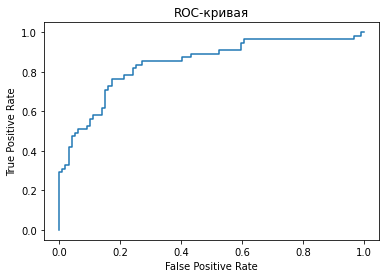

In [265]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [266]:
roc_auc = auc(fpr, tpr)
print("Площади под кривой (AUC-area under curve): ", roc_auc)

Площади под кривой (AUC-area under curve):  0.8416896235078053


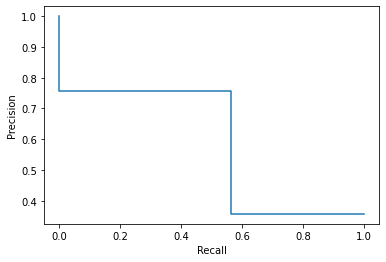

In [267]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_test_logi)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

plt.show()

Значение от 0 до 1 и выше — лучше.

In [268]:
average_precision_score(y_test, y_pred_test_logi)

0.5820082356667723

### метод опорных векторов с линейным ядром (SVC(kernel='linear'))

In [269]:
svc_lin = SVC(kernel='linear', probability=True)
svc_lin.fit(x_train, y_train)

SVC(kernel='linear', probability=True)

In [270]:
y_pred_train_svc_lin = svc_lin.predict(x_train)
y_pred_test_svc_lin = svc_lin.predict(x_test)
f1 = f1_score(y_test, y_pred_test_svc_lin)

print("Вычислим метрику accuracy на тренировочном датасете: ", accuracy_score(y_train, y_pred_train_svc_lin))
print("Вычислим метрику accuracy на тестовом датасете: ", accuracy_score(y_test, y_pred_test_svc_lin))
print("Вычислим метрику F1-score: ", f1)

Вычислим метрику accuracy на тренировочном датасете:  0.7703583061889251
Вычислим метрику accuracy на тестовом датасете:  0.7792207792207793
Вычислим метрику F1-score:  0.6458333333333333


In [271]:
y_pred_proba = svc_lin.predict_proba(x_test)
probs = y_pred_proba[:, 1]
fpr, tpr, treshold = roc_curve(y_test, probs)

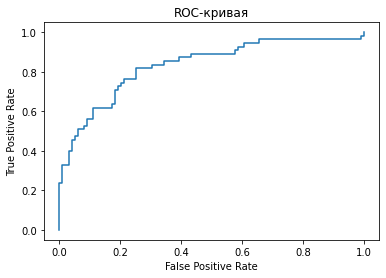

In [272]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [273]:
roc_auc = auc(fpr, tpr)
print("Площади под кривой (AUC-area under curve): ", roc_auc)

Площади под кривой (AUC-area under curve):  0.8325068870523414


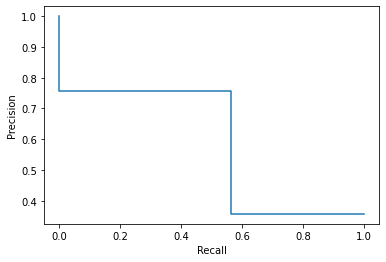

In [274]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_test_svc_lin)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

plt.show()

In [275]:
average_precision_score(y_test, y_pred_test_svc_lin)

0.5820082356667723

### метод линейного дискриминантного анализа (LinearDiscriminantAnalysis)

In [276]:
clf = LinearDiscriminantAnalysis()
clf.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [277]:
y_pred_train_clf = clf.predict(x_train)
y_pred_test_clf = clf.predict(x_test)
f1 = f1_score(y_test, y_pred_test_clf)

print("Вычислим метрику accuracy на тренировочном датасете: ", accuracy_score(y_train, y_pred_train_clf))
print("Вычислим метрику accuracy на тестовом датасете: ", accuracy_score(y_test, y_pred_test_clf))
print("Вычислим метрику F1-score: ", f1)

Вычислим метрику accuracy на тренировочном датасете:  0.7785016286644951
Вычислим метрику accuracy на тестовом датасете:  0.7792207792207793
Вычислим метрику F1-score:  0.6458333333333333


In [278]:
y_pred_proba = clf.predict_proba(x_test)
probs = y_pred_proba[:, 1]
fpr, tpr, treshold = roc_curve(y_test, probs)

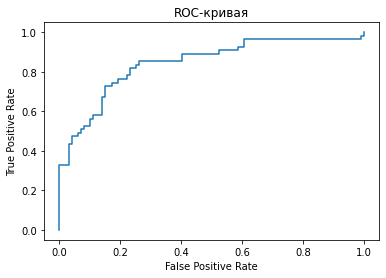

In [279]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [280]:
roc_auc = auc(fpr, tpr)
print("Площади под кривой (AUC-area under curve): ", roc_auc)

Площади под кривой (AUC-area under curve):  0.8429752066115702


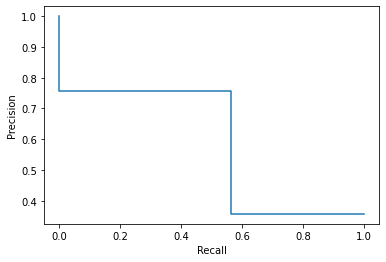

In [281]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_test_clf)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

plt.show()

In [282]:
average_precision_score(y_test, y_pred_test_clf)

0.5820082356667723

### метод k ближайших соседей (KNeighborsClassifier с двумя классами)

In [290]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [291]:
y_pred_train_classifier = classifier.predict(x_train)
y_pred_test_classifier = classifier.predict(x_test)
f1 = f1_score(y_test, y_pred_test_classifier)

print("Вычислим метрику accuracy на тренировочном датасете: ", accuracy_score(y_train, y_pred_train_classifier))
print("Вычислим метрику accuracy на тестовом датасете: ", accuracy_score(y_test, y_pred_test_classifier))
print("Вычислим метрику F1-score: ", f1)

Вычислим метрику accuracy на тренировочном датасете:  0.8485342019543974
Вычислим метрику accuracy на тестовом датасете:  0.7402597402597403
Вычислим метрику F1-score:  0.6226415094339622


In [292]:
y_pred_proba = classifier.predict_proba(x_test)
probs = y_pred_proba[:, 1]
fpr, tpr, treshold = roc_curve(y_test, probs)

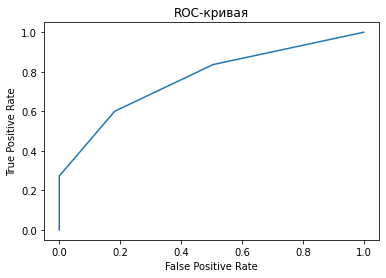

In [293]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [294]:
roc_auc = auc(fpr, tpr)
print("Площади под кривой (AUC-area under curve): ", roc_auc)

Площади под кривой (AUC-area under curve):  0.7659320477502296


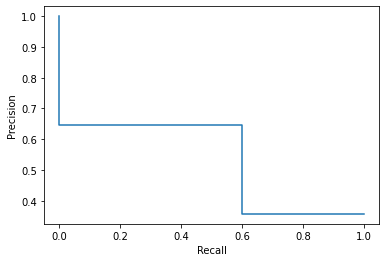

In [295]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_test_classifier)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

plt.show()

In [296]:
average_precision_score(y_test, y_pred_test_classifier)

0.5310924369747899